<a href="https://colab.research.google.com/github/chrisdionisius/PCVK/blob/main/Modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


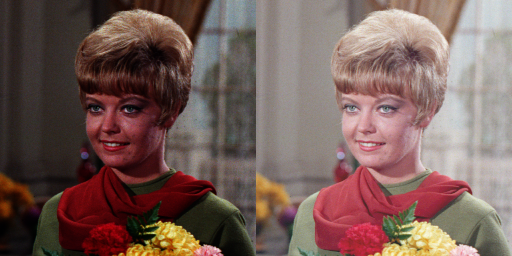

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
invGamma = 1 / gamma
table = [((i / 255) ** invGamma) * 255 for i in range(256)]
table = np.array(table, np.uint8)
gamma_image = cv.LUT(original, table)

final_frame = cv.hconcat((original,gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst. Karena Visual Studio 2017 bekerja hanya
pada 8 bit, maka percobaan ini hanya memanipulasi warna sehingga jumlah warnanya
sesuai dengan kedalamannya. Untuk kasus 7-bit, maka dua warna 8-bit diwakili oleh satu
warna 7-bit. Contoh pixel warna 0 dan 1 pada 8-bit, diwakili oleh warna 0 pada 7-bit. pixel
warna 2 dan 3 pada 8-bit, diwakili oleh warna 1 pada 7-bit, dst.

Masukkan nilai reduction depth: 2


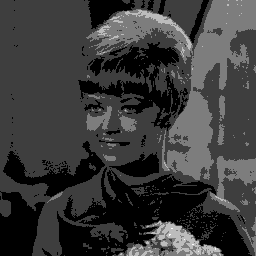

In [ ]:
original_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff',cv.IMREAD_GRAYSCALE)
depth = np.zeros(original_image.shape,original_image.dtype)

try:
  reduction_depth = int(input('Masukkan nilai reduction depth: '))
except ValueError:
  print('Error, not a number')

reduction_level = 255/(2**reduction_depth)-1

for y in range(original_image.shape[0]):
  for x in range(original_image.shape[1]):
    depth[y,x] = np.clip(np.round(original_image[y,x]/reduction_level)*reduction_level,0, 255)
    
cv2_imshow(depth)

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

In [4]:
import glob
import math
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

----------------------------------
Masukkan jumlah denoising image: 50


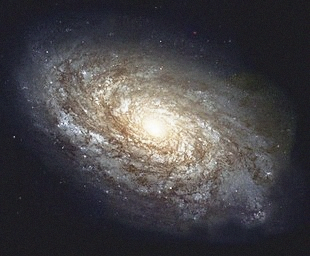

In [13]:
print('----------------------------------')
try:
  denoisingValue = int(input('Masukkan jumlah denoising image: '))
except ValueError:
  print('Error, not a number')
dst = cv_img[0]
for i in range(denoisingValue):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)
cv2_imshow(dst)

In [10]:
def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    # print(x)
  mse = np.mean((first_image) ** 2)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print(' PSNR ')
print('----------------------------------')
try:
  averageCitra = int(input('Masukkan jumlah citra Average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR : ')
print(result)

 PSNR 
----------------------------------
Masukkan jumlah citra Average: 5
Nilai PSNR : 
27.888556876068748




*   5 images = 27.888556876068748
*   30 images = 27.90377379434596
*   60 images = 27.900937384116332
*   80 images = 27.907132841817187
*   100 images = 27.891923507151905



4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/teeth.jpg),
sedangkan image kanan adalah hasilnya:

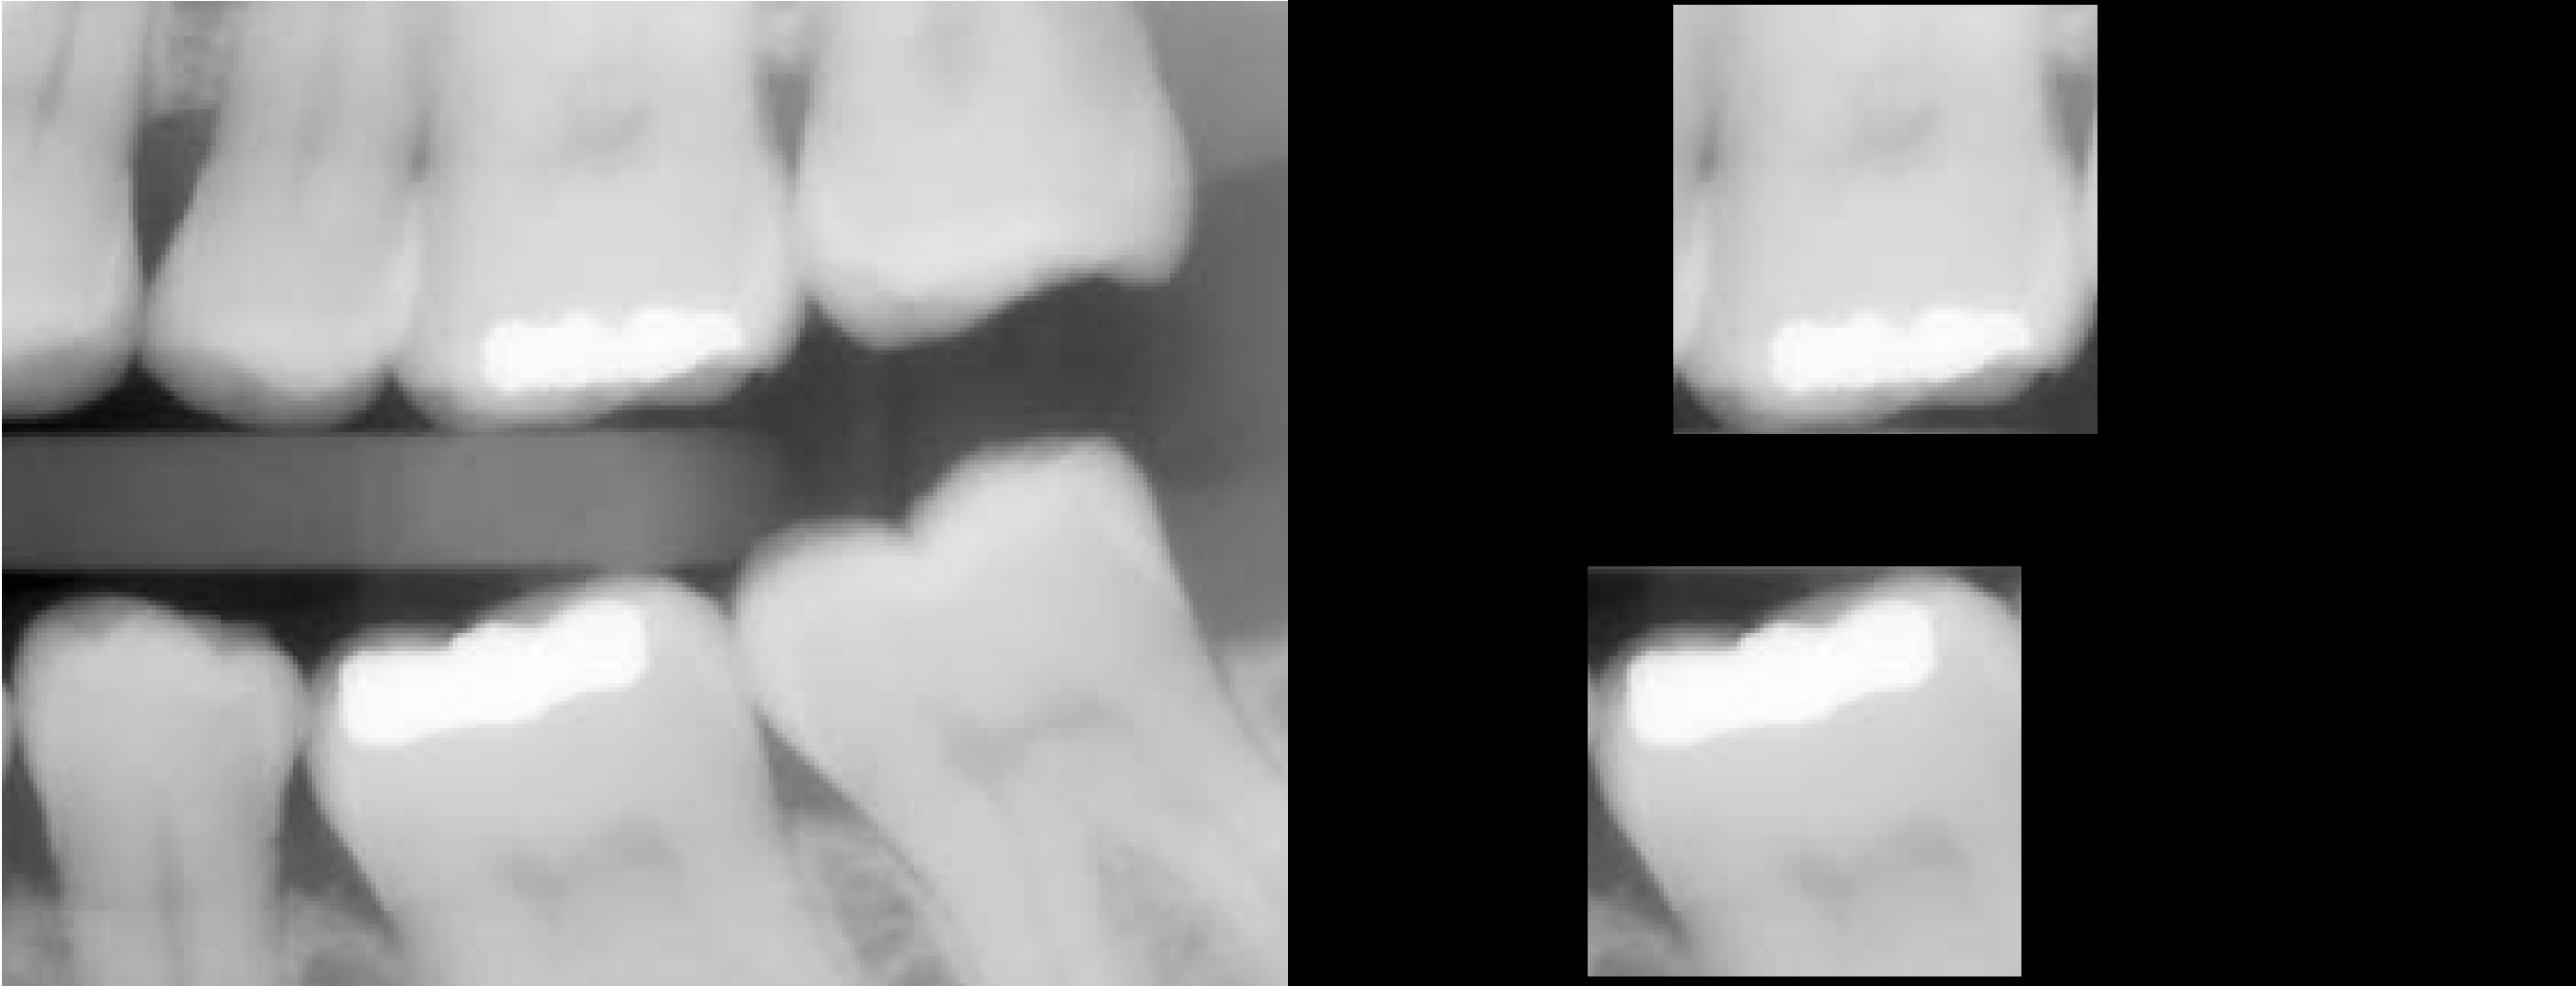

In [17]:
original_teeth = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')

mask = np.zeros(original_teeth.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = original_teeth & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = original_teeth & mask1

teeth_frame = cv.hconcat((original_teeth, result))
cv2_imshow(teeth_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

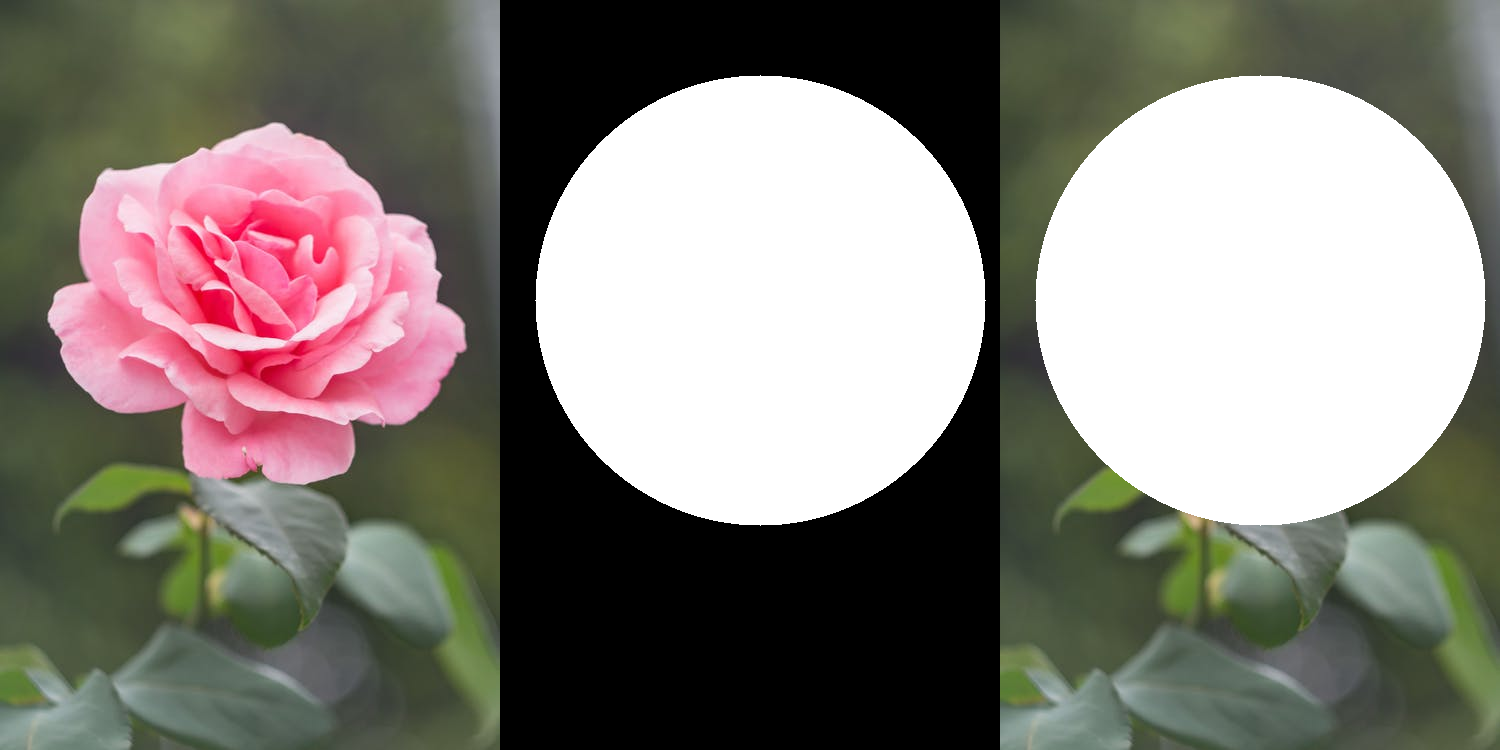

In [24]:
img_rose = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

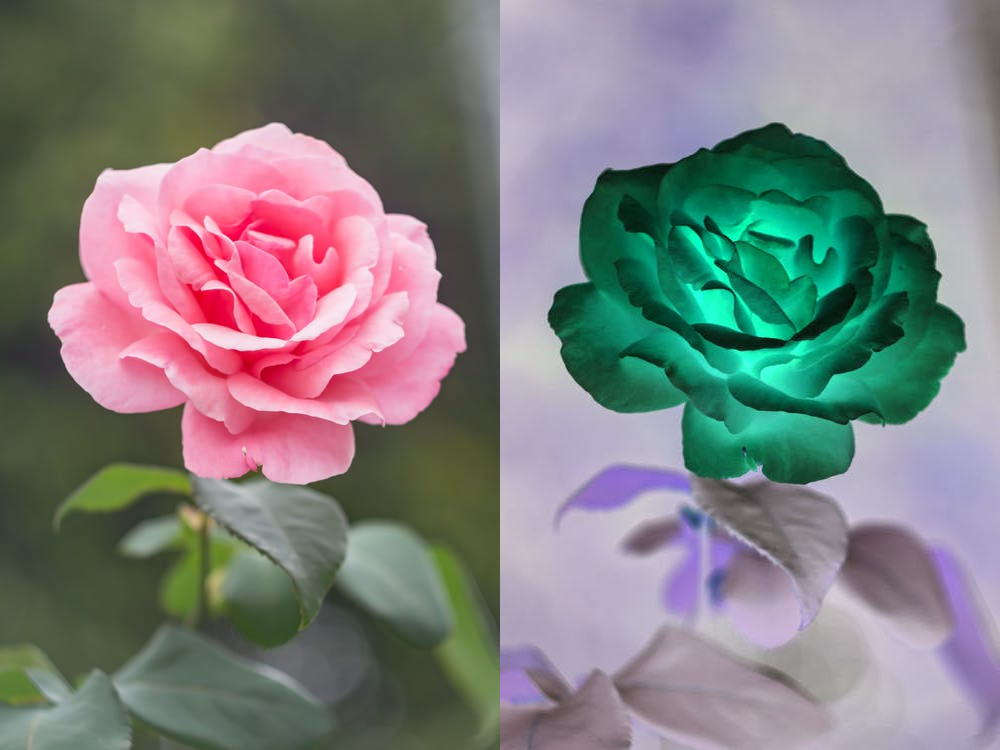

In [32]:
#NOT
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose

rose_frame = cv.hconcat((img_rose, masked))
cv2_imshow(rose_frame)

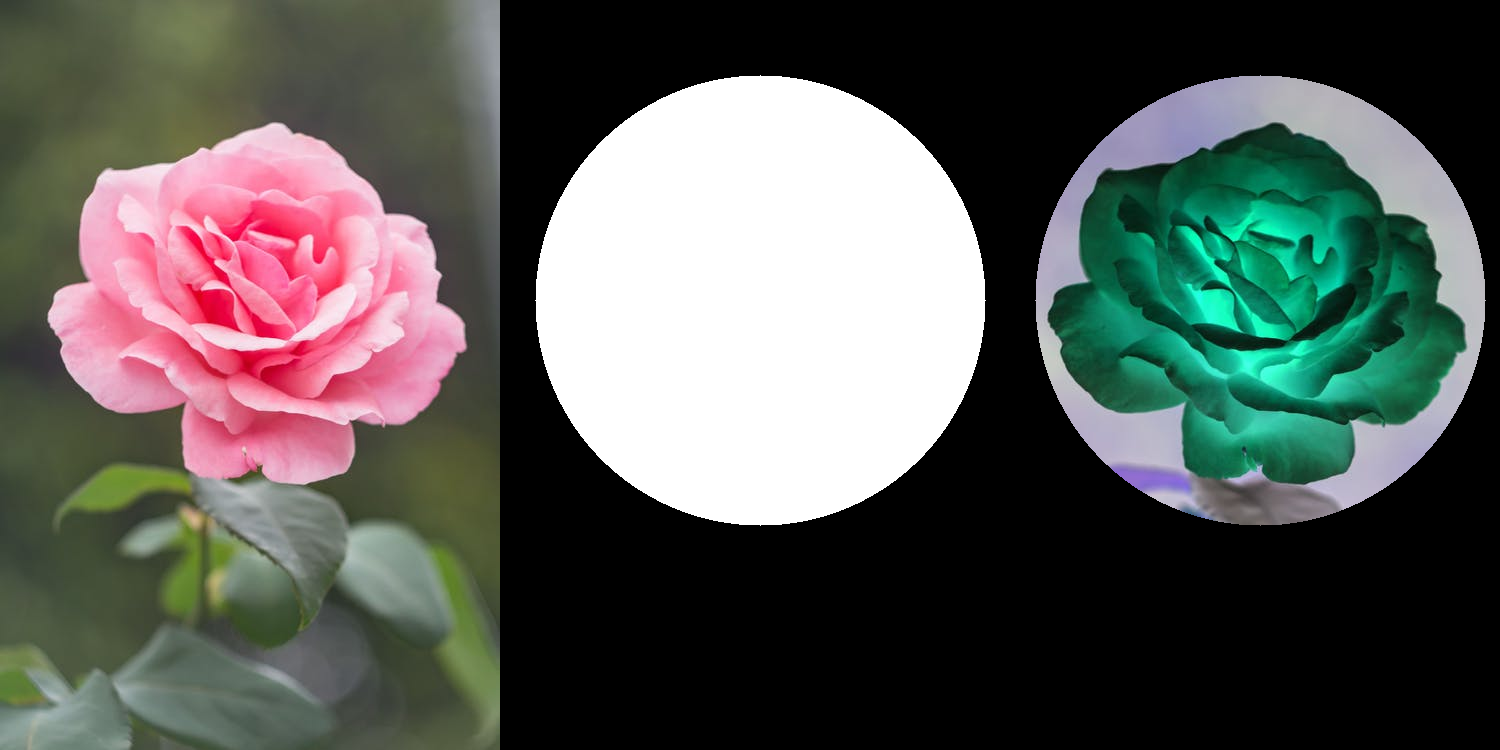

In [28]:
#NAND
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

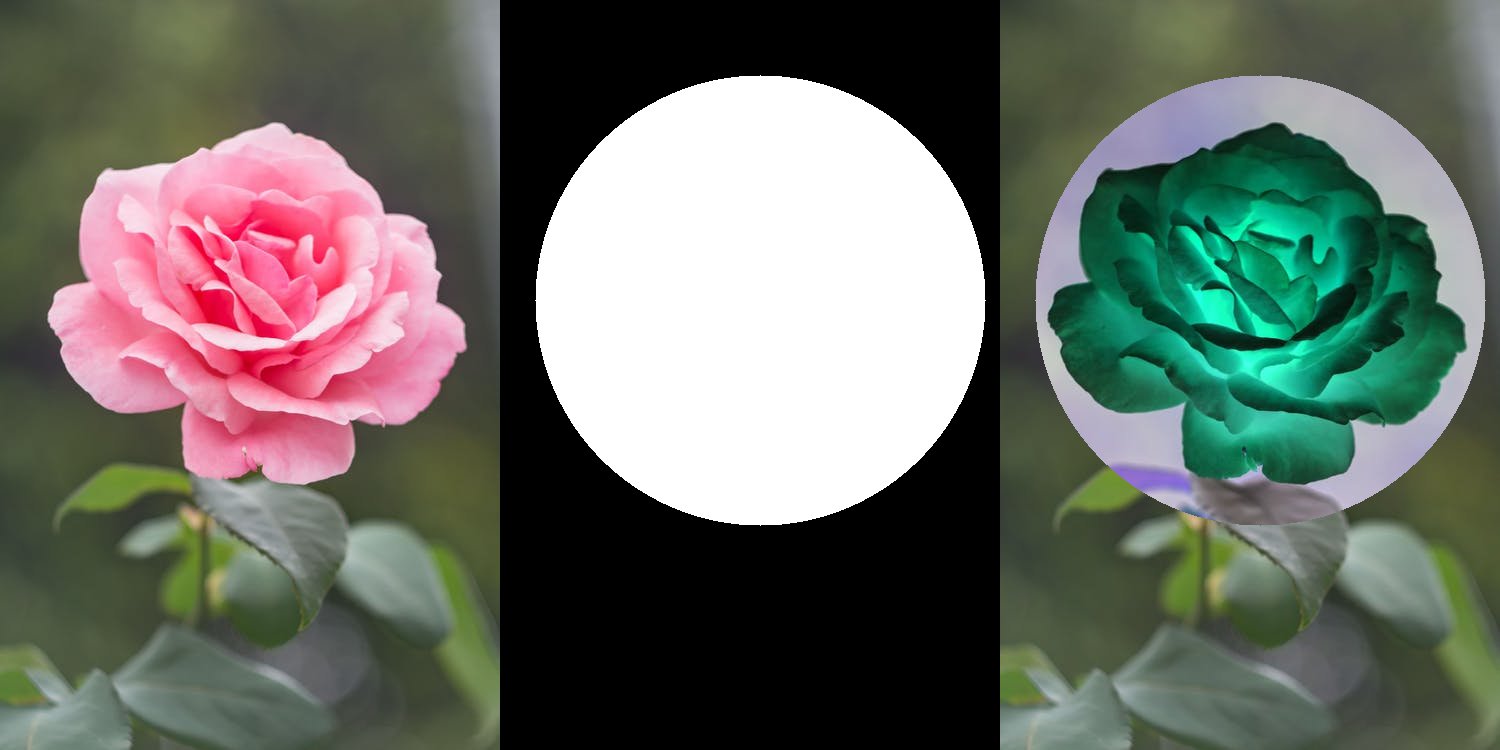

In [29]:
#XOR
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

Tuliskan hasil analisa anda: